#  <u>*Final Task : Pepper Pirate Paradise Ltd. Analysis .*</u>

## <u>*Analysis objective*</u>
### <u>*To predict and forecast the selling prices of Bell Peppers of different colors (green, red, yellow)*</u>

#### *Importing essintial Libraries*

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
from plotly.offline import iplot,plot,init_notebook_mode,download_plotlyjs
%matplotlib inline 
init_notebook_mode(connected=True)

## *A.* <u>*Importing data*</u>

In [3]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Final_Project_data\actual_data.csv")
df.head()

,week_start_dt,week_end_dt,vietnam_season,p_color,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,jordan_max_price,jordan_min_price,demand,supply
0,2015-08-17,2015-08-23,1,yellow,7.249725,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.425,7.025,0.5,0.5
1,2015-08-17,2015-08-23,1,red,7.600215,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,8.125,7.825,0.5,0.5
2,2015-08-17,2015-08-23,1,green,7.074805,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.525,7.225,0.5,0.5
3,2015-08-24,2015-08-30,1,green,7.025085,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.425,7.225,0.5,0.5
4,2015-08-24,2015-08-30,1,red,7.722255,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,8.125,7.825,0.5,0.5


In [4]:
df2=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Final_Project_data\projection_outside_supply.csv")
df2

,week_end_dt,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,total_volume
0,2023-10-08,62609.9,0,2365023.5,27739.8,8678.3,False,False,True,False,2464051.7
1,2023-10-15,22744.0,0,2345998.8,15052.6,6508.7,False,False,True,False,2390304.2
2,2023-10-22,10961.5,0,2555267.6,0.0,15187.1,False,False,True,False,2581416.4
3,2023-10-29,9211.5,0,2530537.9,0.0,15187.1,False,False,True,False,2554936.6


## *B.* <u>*Data shape*</u>

In [5]:
df.shape

(1272, 19)

In [6]:
df2.shape

(4, 11)

## *C.* <u>*Data info*</u>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week_start_dt     1272 non-null   object 
 1   week_end_dt       1272 non-null   object 
 2   vietnam_season    1272 non-null   int64  
 3   p_color           1272 non-null   object 
 4   price             1272 non-null   float64
 5   total_volume      1272 non-null   float64
 6   brazil            1272 non-null   float64
 7   india             1272 non-null   float64
 8   vietnam           1272 non-null   float64
 9   indonesia         1272 non-null   float64
 10  china             1272 non-null   float64
 11  brazil_season     1272 non-null   bool   
 12  indonesia_season  1272 non-null   bool   
 13  india_season      1272 non-null   bool   
 14  china_season      1272 non-null   bool   
 15  jordan_max_price  1241 non-null   float64
 16  jordan_min_price  1241 non-null   float64


---

##  *D.* <u>*Data Cleaning*</u>

### *D.1 na-values*
*for the Null values in the features (jordan_max_price & jordan_min_price) we decided to replace it using the interpolation function as below*

In [8]:
df.interpolate(method="linear",inplace=True,limit_direction="backward")

*Considered the 1st 56 rows as null values and drop it from the model as the numbers of volums are not helpfull*

In [9]:
df.drop(index=df.index[0:57],axis=0,inplace=True)

---

## *E.* <U>*EDA*</U>

*Fom the below table We can notice that :*<br>
*1. the price,total_volume,vietnam mean and median are almos the same -->normaly distributed*<br>
*2. jordan_max_price & jordan_min_price are little right skeweded*<br>
*3. other numeric features are highly right skeweded*

In [10]:
pd.DataFrame(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
vietnam_season,1215.0,1.918519e+00,0.770616,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00
price,1215.0,8.008801e+00,1.367471,6.299625,7.000047e+00,7.600120e+00,8.600505e+00,1.408459e+01
total_volume,1215.0,2.244701e+06,482013.003283,325471.000000,1.938246e+06,2.254902e+06,2.541123e+06,3.555979e+06
brazil,1215.0,2.453030e+05,238532.956065,0.000000,1.060860e+04,1.754931e+05,4.435506e+05,8.776478e+05
india,1215.0,2.874410e+04,55904.812350,0.000000,0.000000e+00,0.000000e+00,3.102260e+04,3.489974e+05
vietnam,1215.0,1.806530e+06,573830.707115,220121.500000,1.402234e+06,1.785219e+06,2.204095e+06,3.549175e+06
indonesia,1215.0,1.549481e+05,243242.278078,0.000000,0.000000e+00,2.150300e+03,2.784692e+05,1.061051e+06
china,1215.0,8.487645e+03,21366.041220,0.000000,0.000000e+00,0.000000e+00,7.257400e+03,2.109202e+05
jordan_max_price,1215.0,8.509403e+00,1.494271,6.225000,7.425000e+00,8.025000e+00,9.225000e+00,1.422500e+01
jordan_min_price,1215.0,7.926667e+00,1.367845,6.025000,6.925000e+00,7.525000e+00,8.525000e+00,1.372500e+01


#### *Mean Price over years "p_color" feature*

In [11]:
for col in df:
    if col in ["week_end_dt"]:
        df[col]=pd.to_datetime(df[col])
        df["year"]=df[col].dt.year
        df["month"]=df[col].dt.month
        df["week"]=df[col].dt.strftime('%U').astype(int) + 1

In [12]:
pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0)

year,2016,2017,2018,2019,2020,2021,2022,2023
p_color,,,,,,,,
green,6.961827,7.648627,6.989052,7.591270,6.785126,6.982395,7.732820,6.962630
red,7.631681,8.652293,7.711202,8.325247,7.178891,7.457629,8.500397,7.495846
yellow,8.612679,9.790707,8.313073,9.006849,8.237391,8.948136,9.710339,8.758655


In [13]:
pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0).pct_change(axis=1)

year,2016,2017,2018,2019,2020,2021,2022,2023
p_color,,,,,,,,
green,NaN,0.098652,-0.086234,0.086166,-0.106194,0.029074,0.107474,-0.099600
red,NaN,0.133734,-0.108768,0.079630,-0.137696,0.038827,0.139826,-0.118177
yellow,NaN,0.136778,-0.150922,0.083456,-0.085430,0.086283,0.085180,-0.098007


In [14]:
(pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0).pct_change(axis=1)).mean(axis=1)

p_color
green     0.004191
red       0.003911
yellow    0.008191
dtype: float64

<u>*Notes:*</u><br>
*  *Clearly we can see that the price mean for each color has changed over years ;*<br>
*  *In 2017,2019,2021 & 2022 the price mean has increased compared to the previous year*<br>
*  *In 2018,2020 & 2023 the price mean has decreased compared to the previous year*<br>
*  *If we looked at the change mean ,will find that for green :.0042 , red : 0.004,and for yellow :.0082*<br>
*  *The mean price percnetage change almost the same for the green and red, ang higher for yellow*<br>
*  *This may be due to affordable price for green and red compared to yellow*

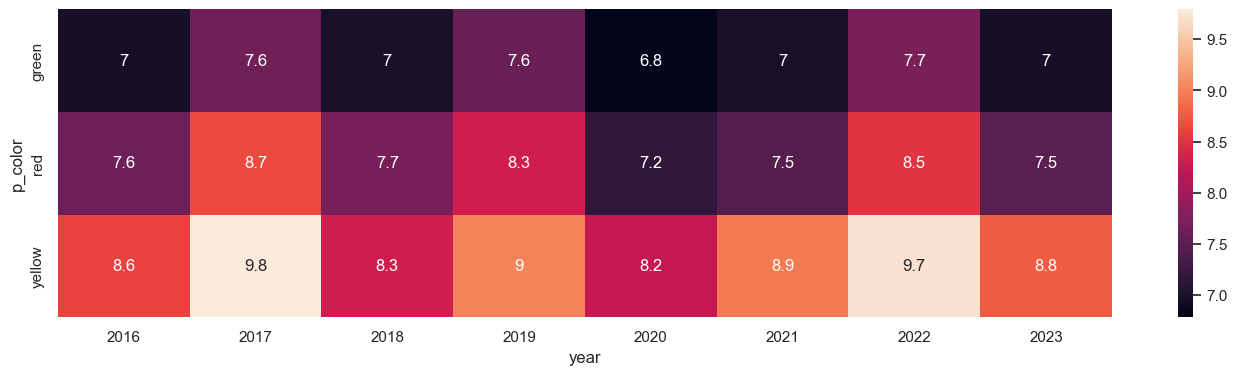

In [15]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0),annot=True);

<Axes: xlabel='year'>

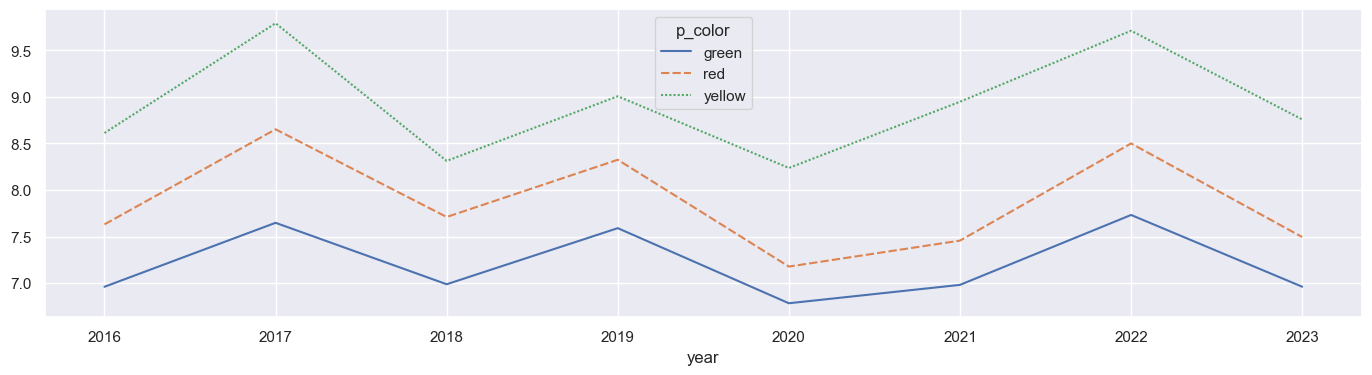

In [16]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.lineplot(data=pd.pivot_table(data=df,index="year",columns="p_color",values="price",aggfunc="mean",fill_value=0))

#### *Mean Price over years "vietnam_season" feature*

In [17]:
pd.pivot_table(data=df,index="vietnam_season",columns="year",values="price",aggfunc="mean",fill_value=0)

year,2016,2017,2018,2019,2020,2021,2022,2023
vietnam_season,,,,,,,,
1,8.461868,9.850618,8.123501,9.302272,7.379042,8.214851,8.635830,8.366485
2,7.603692,7.820821,7.342067,7.132924,7.158987,7.475666,7.809326,7.036705
3,7.008277,8.739437,7.636358,8.828672,7.820225,7.768094,10.082618,7.458803


In [18]:
pd.pivot_table(data=df,index="vietnam_season",columns="year",values="price",aggfunc="mean",fill_value=0).pct_change(axis=1)

year,2016,2017,2018,2019,2020,2021,2022,2023
vietnam_season,,,,,,,,
1,NaN,0.164119,-0.175331,0.145106,-0.206748,0.113268,0.051246,-0.031189
2,NaN,0.028556,-0.061215,-0.028486,0.003654,0.044235,0.044633,-0.098936
3,NaN,0.247016,-0.126219,0.156136,-0.114224,-0.006666,0.297953,-0.260231


<u>*Notes:*</u><br>
*  *Clearly we can see that season _1_ has the highest price mean compared with othr seasons*<br>
*The price mean for each season over years in total :*<br>

*1. season 1: 8.541808*<br>
*2. season 2: 7.422524*<br>
*3. season 3: 8.167810*<br>

*  *Clearly we can see that the price mean for each color has changed over years ;*<br>
*  *In 2022 the price mean has increased compared to the previous year for for all seasons*<br>
*  *In 2018 the price mean has decreased compared to the previous year for for all seasons*<br>
*  *In 2018,2020 & 2023 the price mean has decreased compared to the previos year*<br>
*  *If we looked at the change mean ,will find that for green :.0042 , red : 0.004,and for yellow :.0082*<br>
*  *The mean price percnetage change almost the same for the green and red, and higher for yellow*<br>
*  *This may be due to affordable price for green and red compared to yellow*

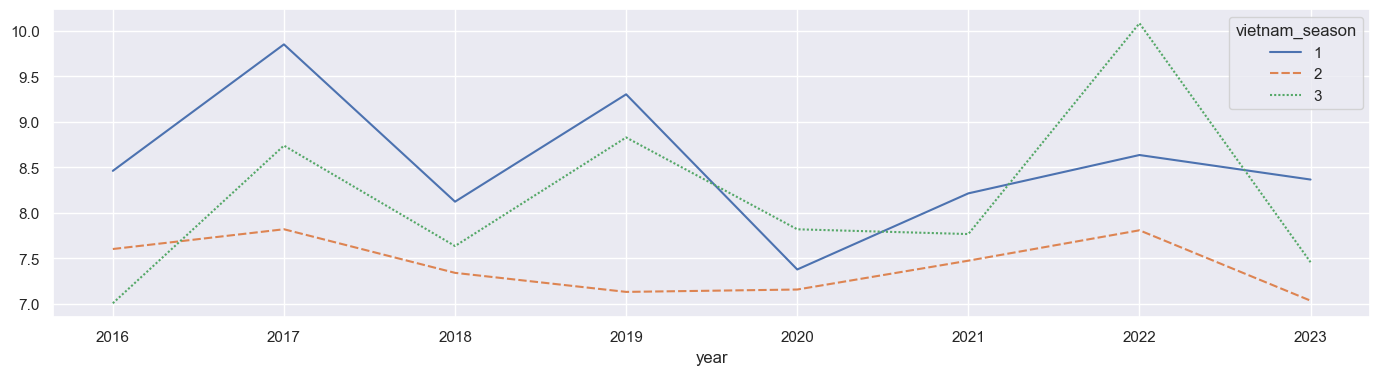

In [20]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.lineplot(pd.pivot_table(data=df,index="year",columns="vietnam_season",values="price",aggfunc="mean",fill_value=0));

#### *Mean Price over years "vietnam_season & month" features*

In [21]:
pd.pivot_table(data=df,index=["vietnam_season","month"],columns="year",values="price",aggfunc="mean",fill_value=0)

year                      2016       2017      2018       2019      2020  \
vietnam_season month                                                       
1              6      8.199191   8.746291  7.481107  11.657056  7.529207   
               7      8.407738   8.757917  8.042950   9.594335  7.418655   
               8      7.734917  10.577989  9.173488   8.586846  7.428109   
               9      9.273130  11.202973  7.749500   8.088309  7.193503   
               10     9.183295  10.308202  0.000000   7.646403  7.116757   
2              1      7.003525   7.407764  7.461562   7.129695  7.262473   
               2      6.843630   7.921179  7.464104   7.106813  7.965575   
               3      6.741365   8.552002  7.371915   7.285070  8.241483   
               10     9.643770   8.494038  7.326880   7.267351  6.963328   
               11     7.518617   7.244884  7.419446   7.009460  6.696623   
               12     7.374542   7.929532  7.093121   7.144081  6.702988   
3              3      6.719142   8.405478  7.534496   7.776338  8.083377   
               4      6.667256   8.864258  7.865533   9.239527  7.821783   
               5      7.317213   8.877065  7.479977   9.224354  7.608457   
               6      7.695085   8.566692  7.421593   9.811860  0.000000   

year                      2021       2022      2023  
vietnam_season month                                 
1              6      7.530713  11.177820  8.309499  
               7      8.195907   8.883393  9.001657  
               8      8.541837   7.818895  8.602208  
               9      8.495922   7.562479  7.560483  
               10     7.583823   7.333183  7.642700  
2              1      6.872300   8.614308  6.980130  
               2      7.015810   8.808210  7.062413  
               3      0.000000   9.183370  7.216752  
               10     7.670080   7.166592  0.000000  
               11     7.779031   6.981335  0.000000  
               12     8.191952   6.931427  0.000000  
3              3      7.984408   8.875006  7.472257  
               4      7.798806  10.149897  7.476652  
               5      7.605067  10.629921  7.384368  
               6      7.595123  10.699830  7.626942

<u>*Notes:*</u><br>
*  *Clearly we can see that*<br>
1. *season _1_ is considerd in the months 6,7,8,9 & 10*<br>
2. *season _2_ is considerd in the months 1,2,3,10,11 & 12*<br>
3. *season _3_ is considerd in the months 3,4,5 & 6*<br>
4. *The month 10 is common between season 1 and 2*<br>
5. *The month 6 is common between season 1 and 3*<br>
6. *The month 3 is common between season 2 and 3*<br>

* *Based on what we observed above ; we can say that the seasons are divided based on the weather conditions as below :*<br> 
1. *season _1_ in the very summer*<br>
2. *season _2_ in the very winter*<br>
3. *season _3_ in Fair weather*

* *Now we can understand that when we are in the very summer months (season 1) price mean is the highest due to the weather status,also it's the lowest in the very winter months (season 2)*<br>
* *Weather impact on peppers :*<br>
*Peppers thrive when temperatures are warm. Being sensitive to the cold, planting should be delayed until the danger of frost is past in the spring. Ideal temperatures are 70°F to 80°F during the day, and 60°F to 70° F at night*<br>
*If you wantto read about this in details click on the [link ](https://www.canr.msu.edu/resources/how_to_grow_peppers_part_2#:~:text=Ideal%20temperatures%20are%2070%C2%B0,often%20results%20in%20blossom%20drop.)**

#### *Mean Price over years "vietnam_season,month & p_color" features*

In [22]:
pd.pivot_table(data=df,index=["vietnam_season","month","p_color"],columns="year",values="price",aggfunc="mean",fill_value=0)

year                               2016       2017      2018       2019  \
vietnam_season month p_color                                              
1              6     green     7.128668   7.866738  6.720123  10.471418   
                     red       8.183295   8.838875  7.408120  11.953655   
                     yellow    9.285608   9.533258  8.315077  12.546095   
               7     green     7.273233   7.957967  7.414026   8.383743   
                     red       7.809943   9.106911  8.336912   9.682638   
                     yellow   10.140039   9.208873  8.377912  10.716625   
               8     green     6.542293   9.100793  8.321257   7.396405   
                     red       7.187482  10.545175  9.265387   8.255165   
                     yellow    9.474977  12.088000  9.933820  10.108968   
               9     green     8.225145   9.231307  7.082382   7.807838   
                     red       9.400305  11.321203  7.817010   8.316298   
                     yellow   10.193940  13.056410  8.349108   8.140790   
               10    green     8.349445   8.924795  0.000000   7.499800   
                     red       9.550595  10.664955  0.000000   7.769830   
                     yellow    9.649845  11.334855  0.000000   7.669580   
2              1     green     6.579187   6.529919  6.712537   6.760163   
                     red       7.175335   7.134881  7.593670   7.208788   
                     yellow    7.256053   8.558491  8.078477   7.420135   
               2     green     6.386917   6.949657  6.676095   6.823725   
                     red       6.969957   7.912660  7.298457   7.239863   
                     yellow    7.174015   8.901220  8.417760   7.256850   
               3     green     6.349345   7.600255  6.575525   6.900000   
                     red       6.649885   8.480485  7.065395   7.519820   
                     yellow    7.224865   9.575265  8.474825   7.435390   
               10    green     8.672343   7.795078  6.912713   6.675277   
                     red       9.929428   8.419800  7.534510   6.952087   
                     yellow   10.329540   9.267238  7.533417   8.174690   
               11    green     6.738065   6.474955  6.904803   6.513027   
                     red       7.161210   6.931208  7.535075   6.540390   
                     yellow    8.656575   8.328490  7.818460   7.974963   
               12    green     6.677610   7.262113  6.756942   6.564160   
                     red       7.121660   7.896171  7.138106   6.666950   
                     yellow    8.324355   8.630313  7.384314   8.201132   
3              3     green     6.350475   7.166712  6.699937   7.290133   
                     red       6.649885   8.116248  7.405260   8.032275   
                     yellow    7.157065   9.933475  8.498290   8.006605   
               4     green     6.312337   7.673931  6.959834   8.142378   
                     red       6.622765   8.700157  7.921818   9.569992   
                     yellow    7.066665  10.218687  8.714946  10.006210   
               5     green     6.539637   7.706193  6.684905   8.134013   
                     red       7.209913   8.849995  7.312353   9.496187   
                     yellow    8.202089  10.075007  8.442673  10.042863   
               6     green     6.699645   7.600255  6.679820   8.800430   
                     red       7.600215   8.449975  7.249920   9.934910   
                     yellow    8.785395   9.649845  8.335040  10.700240   

year                               2020       2021       2022       2023  
vietnam_season month p_color                                              
1              6     green     6.762610   7.050383   9.566737   7.446613  
                     red       7.174737   7.533230  11.166777   8.216313  
                     yellow    8.650272   8.008527  12.799947   9.265572  
               7     green     6.899622   7.737800   8.079958   7.689770  
                     red

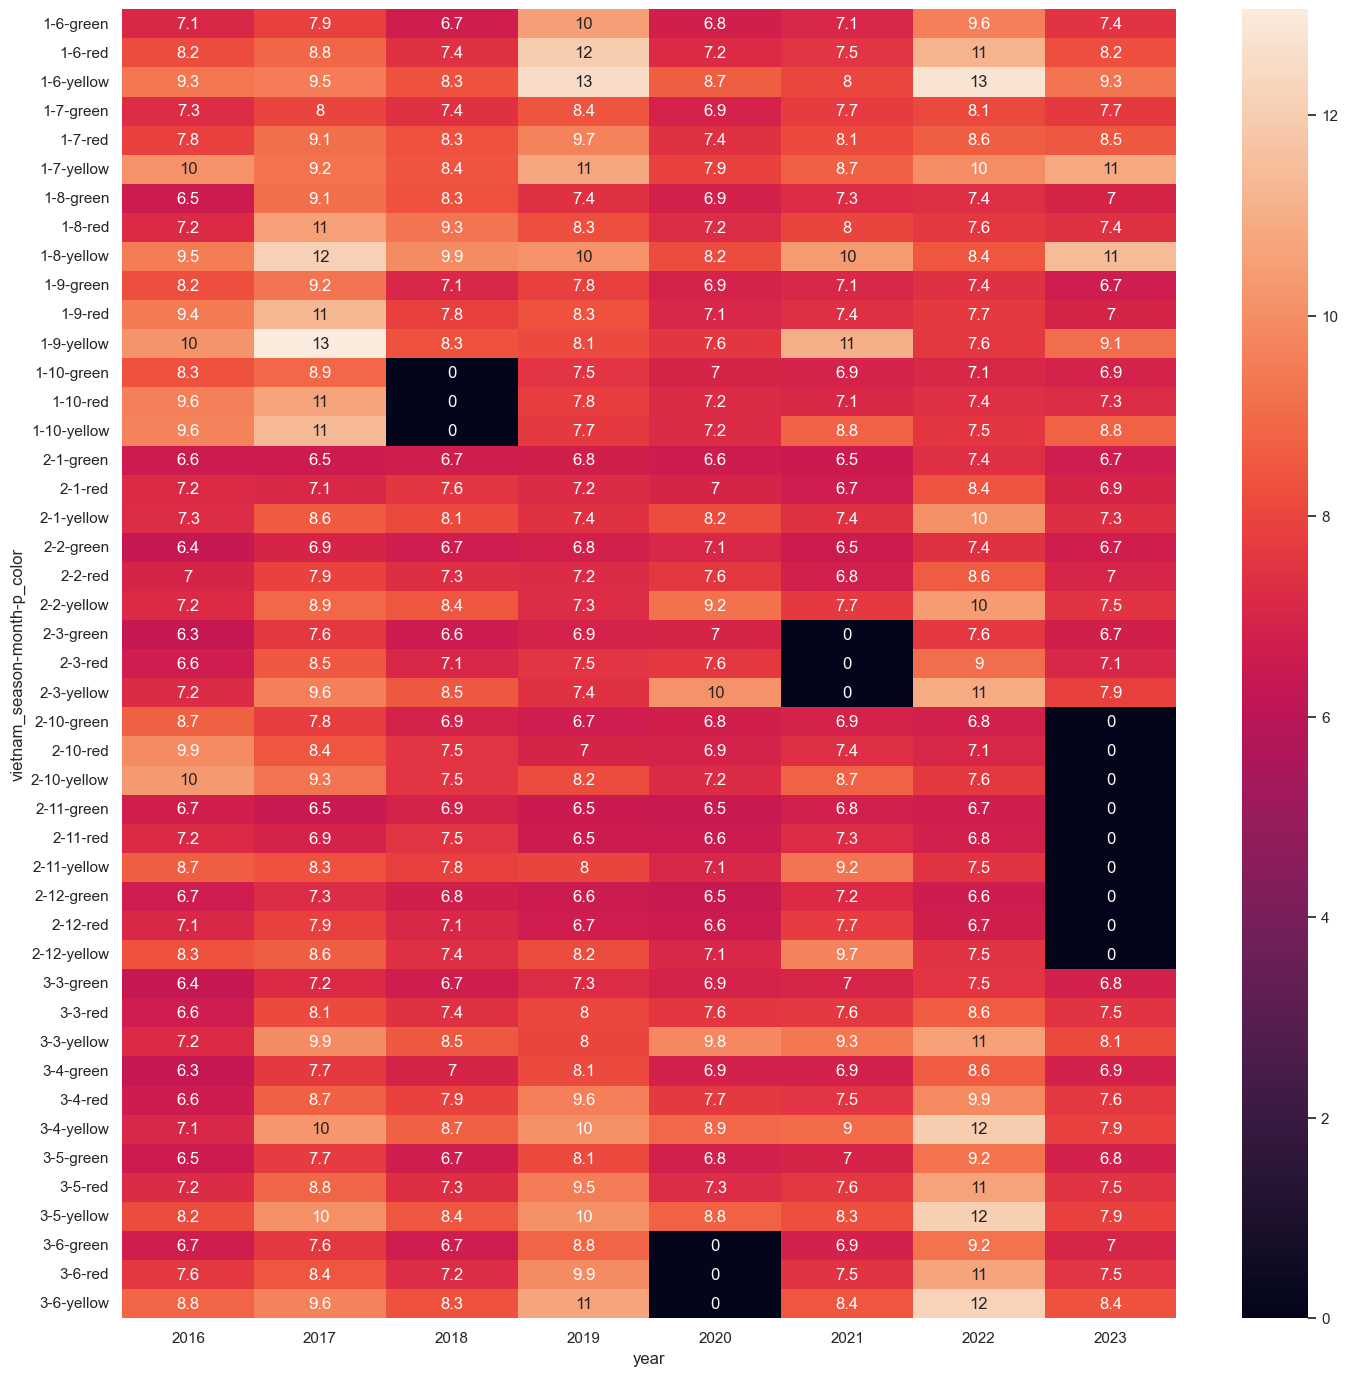

In [23]:
fig, ax = plt.subplots(figsize=(17, 17))
sns.heatmap(pd.pivot_table(data=df,index=["vietnam_season","month","p_color"],columns="year",values="price",aggfunc="mean",fill_value=0),annot=True);


In [24]:
pd.pivot_table(data=df,index=["vietnam_season","month","p_color"],columns="year",values="price",aggfunc="mean",fill_value=0,margins=True).pct_change(axis=1)

year                          2016      2017      2018      2019      2020  \
vietnam_season month p_color                                                 
1              6     green     NaN  0.103535 -0.145755  0.558218 -0.354184   
                     red       NaN  0.080112 -0.161871  0.613588 -0.399787   
                     yellow    NaN  0.026670 -0.127782  0.508837 -0.310521   
               7     green     NaN  0.094144 -0.068352  0.130795 -0.177024   
                     red       NaN  0.166066 -0.084551  0.161418 -0.232518   
                     yellow    NaN -0.091831 -0.090235  0.279152 -0.260486   
               8     green     NaN  0.391071 -0.085656 -0.111143 -0.070473   
                     red       NaN  0.467158 -0.121362 -0.109032 -0.122358   
                     yellow    NaN  0.275781 -0.178208  0.017631 -0.192391   
               9     green     NaN  0.122328 -0.232787  0.102431 -0.114657   
                     red       NaN  0.204344 -0.309525  0.063872 -0.148478   
                     yellow    NaN  0.280801 -0.360536 -0.024951 -0.068103   
               10    green     NaN  0.068909 -1.000000       inf -0.073283   
                     red       NaN  0.116680 -1.000000       inf -0.073354   
                     yellow    NaN  0.174615 -1.000000       inf -0.061200   
2              1     green     NaN -0.007488  0.027966  0.007095 -0.020903   
                     red       NaN -0.005638  0.064302 -0.050685 -0.034501   
                     yellow    NaN  0.179497 -0.056086 -0.081493  0.106244   
               2     green     NaN  0.088108 -0.039363  0.022113  0.036542   
                     red       NaN  0.135252 -0.077623 -0.008028  0.056051   
                     yellow    NaN  0.240758 -0.054314 -0.137912  0.264734   
               3     green     NaN  0.197014 -0.134828  0.049346  0.007274   
                     red       NaN  0.275283 -0.166864  0.064317  0.017261   
                     yellow    NaN  0.325321 -0.114925 -0.122650  0.361682   
               10    green     NaN -0.101157 -0.113195 -0.034348  0.014889   
                     red       NaN -0.152036 -0.105144 -0.077301 -0.005317   
                     yellow    NaN -0.102841 -0.187091  0.085124 -0.119208   
               11    green     NaN -0.039048  0.066386 -0.056739 -0.008177   
                     red       NaN -0.032118  0.087123 -0.132007  0.001489   
                     yellow    NaN -0.037900 -0.061239  0.020017 -0.112226   
               12    green     NaN  0.087532 -0.069563 -0.028531 -0.017194   
                     red       NaN  0.108754 -0.096004 -0.066006 -0.013412   
                     yellow    NaN  0.036755 -0.144375  0.110615 -0.136688   
3              3     green     NaN  0.128532 -0.065131  0.088090 -0.055078   
                     red       NaN  0.220510 -0.087601  0.084672 -0.059668   
                     yellow    NaN  0.387926 -0.144480 -0.057857  0.225054   
               4     green     NaN  0.215704 -0.093055  0.169910 -0.155646   
                     red       NaN  0.313674 -0.089463  0.208055 -0.197744   
                     yellow    NaN  0.446041 -0.147156  0.148167 -0.109282   
               5     green     NaN  0.178382 -0.132528  0.216773 -0.163989   
                     red       NaN  0.227476 -0.173745  0.298650 -0.234936   
                     yellow    NaN  0.228347 -0.162018  0.189536 -0.127734   
               6     green     NaN  0.134427 -0.121106  0.317465 -1.000000   
                     red       NaN  0.111807 -0.142019  0.370348 -1.000000   
                     yellow    NaN  0.098396 -0.136251  0.283766 -1.000000   
All                            NaN  0.124339 -0.117980  0.082997 -0.109213   

year                              2021      2022      2023       All  
vietnam_season month p_color                                          
1              6     green    0.042554  0.356910 -0.221614  0.065399  
                     red      0.049966  0.

<u>*Notes:*</u><br>
*  *Clearly we can see that*<br>
1. *yellow peppers still have the highiest price mean in all seasons,months and years (over-all)*<br>
2. *The over all price mean change is 0.034857*

#### *Mean Price over years "for country seasson except veitnam" features*

In [25]:
pd.pivot_table(data=df,index=["indonesia_season","india_season","china_season","brazil_season"],columns="year",
               values="price",aggfunc="mean",fill_value=0)

year                                                          2016       2017  \
indonesia_season india_season china_season brazil_season                        
False            False        False        False          7.088741   7.778144   
                                           True           7.028343   8.869950   
                 True         False        False          9.551675   8.856871   
                              True         False          9.273130  11.202973   
True             False        True         True           8.259039   8.732794   
                 True         True         True           7.734917  10.577989   

year                                                          2018       2019  \
indonesia_season india_season china_season brazil_season                        
False            False        False        False          7.372450   7.231577   
                                           True           7.694174   9.231940   
                 True         False        False          7.326880   7.362114   
                              True         False          7.749500   8.088309   
True             False        True         True           7.786629  10.535269   
                 True         True         True           9.173488   8.586846   

year                                                          2020      2021  \
indonesia_season india_season china_season brazil_season                       
False            False        False        False          7.353739  7.535538   
                                           True           7.703269  7.691173   
                 True         False        False          7.001685  7.652829   
                              True         False          7.193503  8.495922   
True             False        True         True           7.473931  7.871361   
                 True         True         True           7.428109  8.541837   

year                                                           2022      2023  
indonesia_season india_season china_season brazil_season                       
False            False        False        False           8.083991  7.137217  
                                           True           10.416577  7.435637  
                 True         False        False           7.199910  7.642700  
                              True         False           7.562479  7.560483  
True             False        True         True            9.850028  8.618191  
                 True         True         True            7.818895  8.602208

#### *Mean Price "by all countries in all seasons"*

In [26]:
pd.pivot_table(data=df,columns="vietnam_season",index=['brazil_season','indonesia_season','india_season','china_season'],values="price",aggfunc="mean")

vietnam_season                                                   1         2  \
brazil_season indonesia_season india_season china_season                       
False         False            False        False              NaN  7.382937   
                               True         False         8.116338  7.842211   
                                            True          8.363029       NaN   
True          False            False        False              NaN       NaN   
              True             False        True          8.688615       NaN   
                               True         True          8.524327       NaN   

vietnam_season                                                   3  
brazil_season indonesia_season india_season china_season            
False         False            False        False         7.866505  
                               True         False              NaN  
                                            True               NaN  
True          False            False        False         8.245178  
              True             False        True          8.488161  
                               True         True               NaN

<u>*Notes:*</u><br>
*  *when veitnam on season 1,2 & indai on season the  prices in veitnam season 2 (very winter season) and the price average is 7.769291 with increased mean when comparing with * the season time where veitman is alone*<br>
* *when veitnam on season 1 and all other countries are on season the price mean is 8.456055*<br>
* *when veitnam on season 3 and brazil on season the price mean is 8.245178*<br>
* *when veitnam on season 1 and china,india on season the price mean is 8.259345*

#### *Mean Price over time "by all countries in all seasons"*

In [27]:
pd.pivot_table(data=df,columns='year',index=['brazil_season','indonesia_season','india_season','china_season','vietnam_season','month'],
               values="price",aggfunc="mean",margins=True)

year                                                                               2016  \
brazil_season indonesia_season india_season china_season vietnam_season month             
False         False            False        False        2              1      7.003525   
                                                                        2      6.843630   
                                                                        3      6.741365   
                                                                        11     7.518617   
                                                                        12     7.374542   
                                                         3              3      6.719142   
                               True         False        1              10     9.183295   
                                                         2              10     9.643770   
                                            True         1              9      9.273130   
True          False            False        False        3              4      6.667256   
                                                                        5      7.317213   
              True             False        True         1              6      8.199191   
                                                                        7      8.407738   
                                                         3              6      7.695085   
                               True         True         1              8      7.734917   
All                                                                            7.735396   

year                                                                                2017  \
brazil_season indonesia_season india_season china_season vietnam_season month              
False         False            False        False        2              1       7.407764   
                                                                        2       7.921179   
                                                                        3       8.552002   
                                                                        11      7.244884   
                                                                        12      7.929532   
                                                         3              3       8.405478   
                               True         False        1              10     10.308202   
                                                         2              10      8.494038   
                                            True         1              9      11.202973   
True          False            False        False        3              4       8.864258   
                                                                        5       8.877065   
              True             False        True         1              6       8.746291   
                                                                        7       8.757917   
                                                         3              6       8.566692   
                               True         True         1              8      10.577989   
All                                                                             8.697209   

year                                                                               2018  \
brazil_season indonesia_season india_season china_season vietnam_season month             
False         False            False        False        2              1      7.461562   
                                                                        2      7.464104   
                                                                        3      7.371915   
                                                                        11     7.419446   
                                                                        12     7.093121   
                                                         3         

In [28]:
pd.pivot_table(data=df,columns='year',index=['brazil_season','indonesia_season','india_season','china_season','vietnam_season','month'],
               values="price",aggfunc="mean",margins=True).pct_change(axis=1)

year                                                                           2016  \
brazil_season indonesia_season india_season china_season vietnam_season month         
False         False            False        False        2              1       NaN   
                                                                        2       NaN   
                                                                        3       NaN   
                                                                        11      NaN   
                                                                        12      NaN   
                                                         3              3       NaN   
                               True         False        1              10      NaN   
                                                         2              10      NaN   
                                            True         1              9       NaN   
True          False            False        False        3              4       NaN   
                                                                        5       NaN   
              True             False        True         1              6       NaN   
                                                                        7       NaN   
                                                         3              6       NaN   
                               True         True         1              8       NaN   
All                                                                             NaN   

year                                                                               2017  \
brazil_season indonesia_season india_season china_season vietnam_season month             
False         False            False        False        2              1      0.057719   
                                                                        2      0.157453   
                                                                        3      0.268586   
                                                                        11    -0.036407   
                                                                        12     0.075258   
                                                         3              3      0.250975   
                               True         False        1              10     0.122495   
                                                         2              10    -0.119220   
                                            True         1              9      0.208111   
True          False            False        False        3              4      0.329521   
                                                                        5      0.213176   
              True             False        True         1              6      0.066726   
                                                                        7      0.041650   
                                                         3              6      0.113268   
                               True         True         1              8      0.367563   
All                                                                            0.124339   

year                                                                               2018  \
brazil_season indonesia_season india_season china_season vietnam_season month             
False         False            False        False        2              1      0.007262   
                                                                        2     -0.057703   
                                                                        3     -0.137990   
                                                                        11     0.024094   
                                                                        12    -0.105481   
                                                         3              3     -0.103621   
                               True         False        1        

<u>*Notes:*</u><br>
* *when veitnam on season 2 and in months 11,12,1,2 no other country is on season*<br>
* *when veitnam on season 2 in month 10, and india is on season the price mean is 7.762919*<br>
* *when veitnam on season 3 alone the price mean is 7.866505*<br>
* *when all countries are on season the price mean is 8.456055 and this in month 8*<br>
* *The over all changed in the price mean considering all countrires in in line 0.029839*<br>
* *when brazil on season ,veitnam in season 3 ,both on month 5 ,the highest price mean change over years 0.119731*<br>
* *when brazil,indoneian, china on season ,veitnam in season 3 ,both on month 6 ,the highest 2nd price mean change over years 0.112918*<br>
* *The lowest change in pric mean was 0.029925,and this was when only veitnem on season 2 alone in month 11*<br>

#### *Mean Price over time "by p_color and by all countries in all seasons"*

In [29]:
pd.pivot_table(data=df,columns='year',index=['brazil_season','indonesia_season','india_season','china_season','vietnam_season','month','p_color'],
               values="price",aggfunc="mean",margins=True)

year                                                                                        2016  \
brazil_season indonesia_season india_season china_season vietnam_season month p_color              
False         False            False        False        2              1     green     6.579187   
                                                                              red       7.175335   
                                                                              yellow    7.256053   
                                                                        2     green     6.386917   
                                                                              red       6.969957   
                                                                              yellow    7.174015   
                                                                        3     green     6.349345   
                                                                              red       6.649885   
                                                                              yellow    7.224865   
                                                                        11    green     6.738065   
                                                                              red       7.161210   
                                                                              yellow    8.656575   
                                                                        12    green     6.677610   
                                                                              red       7.121660   
                                                                              yellow    8.324355   
                                                         3              3     green     6.350475   
                                                                              red       6.649885   
                                                                              yellow    7.157065   
                               True         False        1              10    green     8.349445   
                                                                              red       9.550595   
                                                                              yellow    9.649845   
                                                         2              10    green     8.672343   
                                                                              red       9.929428   
                                                                              yellow   10.329540   
                                            True         1              9     green     8.225145   
                                                                              red       9.400305   
                                                                              yellow   10.193940   
True          False            False        False        3              4     green     6.312337   
                                                                              red       6.622765   
                                                                              yellow    7.066665   
                                                                        5     green     6.539637   
                                                                              red       7.209913   
                                                                              yellow    8.202089   
              True             False        True         1              6     green     7.128668   
                                                                              red       8.183295   
                                                                              yellow    9.285608   
                                                                        7     green     7.273233   
                                                                              red       7.809943   


In [30]:
pd.pivot_table(data=df,columns='year',index=['brazil_season','indonesia_season','india_season','china_season','vietnam_season','month','p_color'],
               values="price",aggfunc="mean",margins=True).pct_change(axis=1)

year                                                                                   2016  \
brazil_season indonesia_season india_season china_season vietnam_season month p_color         
False         False            False        False        2              1     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        2     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        3     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        11    green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        12    green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                         3              3     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                               True         False        1              10    green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                         2              10    green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                            True         1              9     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
True          False            False        False        3              4     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        5     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
              True             False        True         1              6     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        7     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                         3              6     green     NaN   
          

<u>*Notes:*</u><br>
* *The price mean on average over years is 8.008801*<br>
* *The price mean change on average over years is 0.034857*

---

## *F. <u>Data Transformation*</u>

*Transform the feature "vietnam_season" to str in order to apply one hot encoding later*

In [31]:
df["vietnam_season"]=df["vietnam_season"].astype("str")

*Replacing the values [True,Fales] with 1,0 ,where 1 is True & 0 is False*

In [32]:
for col in df:
    if col in ["brazil_season","indonesia_season","india_season","china_season"]:
        df[col]=df[col].apply(lambda x:1 if x is True else 0)

*Applying one hot encoding the the features ["vietnam_season","p_color"]:*

In [33]:
for col in df:
    if col in ["vietnam_season","p_color"]:        
        one_hot_encoded_data = pd.get_dummies(df[col])
        one_hot_encoded_data=one_hot_encoded_data.applymap(lambda x:1 if x is True else 0 )
        df=pd.concat([df.drop([col],axis=1),one_hot_encoded_data],axis=1)
        df.rename(columns={"1":"vietnam_season_1","2":"vietnam_season_2","3":"vietnam_season_3"},inplace=True)

In [34]:
from datetime import datetime,timedelta
future_date_index=pd.date_range(start="2023-10-08",end="2023-10-29",freq="W")
future_date=pd.DataFrame({"date":future_date_index}).set_index("date")

*Concatenate the two data sets in one*

In [35]:
df=pd.concat([df,df2],axis=0)
df

,week_start_dt,week_end_dt,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,...,supply,year,month,week,vietnam_season_1,vietnam_season_2,vietnam_season_3,green,red,yellow
57,2015-12-28,2016-01-03 00:00:00,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,...,0.500000,2016.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0
58,2015-12-28,2016-01-03 00:00:00,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,...,0.500000,2016.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0
59,2015-12-28,2016-01-03 00:00:00,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,...,0.500000,2016.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0
60,2016-01-04,2016-01-10 00:00:00,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,...,0.500000,2016.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0
61,2016-01-04,2016-01-10 00:00:00,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,...,0.500000,2016.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,2023-09-25,2023-10-01 00:00:00,8.758362,2665343.9,167.8,45376.1,2521054.0,78334.2,8618.2,0,...,196.703982,2023.0,10.0,41.0,1.0,0.0,0.0,0.0,0.0,1.0
0,NaN,2023-10-08,NaN,2464051.7,62609.9,0.0,2365023.5,27739.8,8678.3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2023-10-15,NaN,2390304.2,22744.0,0.0,2345998.8,15052.6,6508.7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2023-10-22,NaN,2581416.4,10961.5,0.0,2555267.6,0.0,15187.1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Droppring the feature "week_start_dt"*

In [36]:
df.drop('week_start_dt',axis=1,inplace=True)

*Transform the feature "week_end_dt" to date type and extract Year,Month*

In [37]:
for col in df:
    if col in ["week_end_dt"]:
        df[col]=pd.to_datetime(df[col])
        df["year"]=df[col].dt.year
        df["month"]=df[col].dt.month

*Set the Feature "week_end_dt" as index*

In [38]:
df.set_index("week_end_dt",inplace=True)

In [39]:
df

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,supply,year,month,week,vietnam_season_1,vietnam_season_2,vietnam_season_3,green,red,yellow
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-03,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.500000,2016,1,2.0,0.0,1.0,0.0,1.0,0.0,0.0
2016-01-03,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.500000,2016,1,2.0,0.0,1.0,0.0,0.0,1.0,0.0
2016-01-03,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.500000,2016,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0
2016-01-10,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,0.500000,2016,1,3.0,0.0,1.0,0.0,0.0,0.0,1.0
2016-01-10,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,0.500000,2016,1,3.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,8.758362,2665343.9,167.8,45376.1,2521054.0,78334.2,8618.2,0,0,1,...,196.703982,2023,10,41.0,1.0,0.0,0.0,0.0,0.0,1.0
2023-10-08,NaN,2464051.7,62609.9,0.0,2365023.5,27739.8,8678.3,0,0,1,...,NaN,2023,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-10-15,NaN,2390304.2,22744.0,0.0,2345998.8,15052.6,6508.7,0,0,1,...,NaN,2023,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Replace the new null values with the 0*

In [40]:
df.fillna(0,inplace=True)

In [41]:
df

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,supply,year,month,week,vietnam_season_1,vietnam_season_2,vietnam_season_3,green,red,yellow
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-03,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.500000,2016,1,2.0,0.0,1.0,0.0,1.0,0.0,0.0
2016-01-03,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.500000,2016,1,2.0,0.0,1.0,0.0,0.0,1.0,0.0
2016-01-03,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.500000,2016,1,2.0,0.0,1.0,0.0,0.0,0.0,1.0
2016-01-10,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,0.500000,2016,1,3.0,0.0,1.0,0.0,0.0,0.0,1.0
2016-01-10,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,0.500000,2016,1,3.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,8.758362,2665343.9,167.8,45376.1,2521054.0,78334.2,8618.2,0,0,1,...,196.703982,2023,10,41.0,1.0,0.0,0.0,0.0,0.0,1.0
2023-10-08,0.000000,2464051.7,62609.9,0.0,2365023.5,27739.8,8678.3,0,0,1,...,0.000000,2023,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-15,0.000000,2390304.2,22744.0,0.0,2345998.8,15052.6,6508.7,0,0,1,...,0.000000,2023,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
